In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dataset = pd.read_csv('../Y3 - Sample data/Z2 - datasetprepclean.csv', index_col = 0,
                     )
print('dataset shape:', dataset.shape)
dataset.head()

dataset shape: (5401, 665)


,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,bendlength_bend_edge_length_std_04,bendlength_bend_edge_length_min_04,bendlength_bend_edge_length_max_04,VAMAT,VALAJOUT,VALTOT,VOL_COST_CONVHULL,VOL_COST_RECTANGLE,VOL_COST_MPATTERN,bend_group
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,286893.718750,4.0,...,163.73709,29.010676,594.972659,12.51,5.15,17.66,0.000010,0.000007,0.000011,3-5
L1600470,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,3403.138184,10.0,...,0.00000,0.000000,0.000000,0.25,0.92,1.17,0.000007,0.000007,0.000007,0
L1600600,3710.627930,1,0,522587.812500,522587.81250,1509.000000,346.313995,522587.812500,522587.812500,3.0,...,0.00000,0.000000,0.000000,18.36,7.55,25.91,0.000012,0.000012,0.000012,1-2
L1600610,3232.627930,1,0,439818.781250,439818.78125,1270.000000,346.313995,439818.781250,439818.781250,3.0,...,0.00000,0.000000,0.000000,9.18,4.77,13.95,0.000007,0.000007,0.000007,1-2
L1600620,2972.627930,1,0,394797.968750,394797.96875,1140.000000,346.313995,394797.968750,394797.968750,3.0,...,0.00000,0.000000,0.000000,9.18,4.65,13.83,0.000008,0.000008,0.000008,1-2


In [13]:
dataset.columns.values

array(['cut_length', 'num_closed_patterns', 'num_open_patterns',
       'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1',
       'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area',
       'thickness', 'radius_approx', 'radius_count', 'direction_count',
       'bend_count', 'benddxf_bend_radius_00', 'benddxf_bend_angle_00',
       'benddxf_bend_direction_00', 'benddxf_deformation_length_00',
       'benddxf_merged_bend_00', 'benddxf_punch_length_00',
       'benddxf_bend_radius_01', 'benddxf_bend_angle_01',
       'benddxf_bend_direction_01', 'benddxf_deformation_length_01',
       'benddxf_merged_bend_01', 'benddxf_punch_length_01',
       'benddxf_bend_radius_02', 'benddxf_bend_angle_02',
       'benddxf_bend_direction_02', 'benddxf_deformation_length_02',
       'benddxf_merged_bend_02', 'benddxf_punch_length_02',
       'benddxf_bend_radius_03', 'benddxf_bend_angle_03',
       'benddxf_bend_direction_03', 'benddxf_deformation_length_03',
       'benddxf_mer

In [14]:
dataset= dataset.drop(['temp'],axis=1)

In [15]:
for index, nancount in dataset.isnull().sum().iteritems():
    if nancount != 0:
        print(index, '-->', nancount)
else:
    print('Done !')

benddxf_deformation_length_00 --> 262
benddxf_deformation_length_01 --> 123
benddxf_deformation_length_02 --> 19
benddxf_deformation_length_03 --> 6
benddxf_deformation_length_04 --> 1
benddxf_deformation_length_05 --> 1
bendlength_deformation_length_00 --> 296
bendlength_deformation_length_01 --> 112
bendlength_deformation_length_02 --> 3
bendlength_deformation_length_03 --> 1
Done !


In [16]:
#Cleaning of the remaining Nan
#dataset = dataset.fillna(0)
dataset = dataset.dropna()
dataset.shape

(5105, 664)

In [31]:
dataset.head()

,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,bendlength_bend_edge_length_std_04,bendlength_bend_edge_length_min_04,bendlength_bend_edge_length_max_04,VAMAT,VALAJOUT,VALTOT,VOL_COST_CONVHULL,VOL_COST_RECTANGLE,VOL_COST_MPATTERN,bend_group
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,286893.718750,4.0,...,163.73709,29.010676,594.972659,12.51,5.15,17.66,0.000010,0.000007,0.000011,3-5
L1600470,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,3403.138184,10.0,...,0.00000,0.000000,0.000000,0.25,0.92,1.17,0.000007,0.000007,0.000007,0
L1600600,3710.627930,1,0,522587.812500,522587.81250,1509.000000,346.313995,522587.812500,522587.812500,3.0,...,0.00000,0.000000,0.000000,18.36,7.55,25.91,0.000012,0.000012,0.000012,1-2
L1600610,3232.627930,1,0,439818.781250,439818.78125,1270.000000,346.313995,439818.781250,439818.781250,3.0,...,0.00000,0.000000,0.000000,9.18,4.77,13.95,0.000007,0.000007,0.000007,1-2
L1600620,2972.627930,1,0,394797.968750,394797.96875,1140.000000,346.313995,394797.968750,394797.968750,3.0,...,0.00000,0.000000,0.000000,9.18,4.65,13.83,0.000008,0.000008,0.000008,1-2


In [17]:
minocc = 50
todrop = []
df = dataset['thickness'].reset_index().groupby('thickness').count()
for index, occ in df.iterrows():
    if occ.COART <= minocc:
        todrop.append(index)
        print(index, 'will be dropped')

for thickness in todrop:
    dataset = dataset[dataset['thickness'] != thickness]

1.5 will be dropped
2.5 will be dropped
20.0 will be dropped


In [18]:
dataset['thickness'].nunique()

9

# Blocs creation

In [19]:
#Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()

In [21]:
#T-sne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)

In [22]:
#Kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,
                random_state=0
               )

# X definition

In [35]:
start = dataset.columns.values
todrop = ['bend_group', 'radius_approx', 'bend_group', 'mask']
def representsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False
benddetails  = [x for x in dataset.columns.values if representsInt(x[-2:])]
todrop.extend(benddetails)
tokeep = [x for x in start if x not in todrop ]
tokeep

['cut_length',
 'num_closed_patterns',
 'num_open_patterns',
 'total_area',
 'minimum_rectangle_area',
 'minimum_rectangle_dim1',
 'minimum_rectangle_dim2',
 'convex_hull_area',
 'no_hole_area',
 'thickness',
 'radius_count',
 'direction_count',
 'bend_count',
 'bend_gr_0_bend_radius_count',
 'bend_gr_0_bend_radius_countdif',
 'bend_gr_0_bend_radius_mean',
 'bend_gr_0_bend_radius_std',
 'bend_gr_0_bend_radius_max',
 'bend_gr_0_bend_radius_min',
 'bend_gr_0_bend_angle_countdif',
 'bend_gr_0_bend_angle_mean',
 'bend_gr_0_bend_angle_std',
 'bend_gr_0_bend_angle_max',
 'bend_gr_0_bend_angle_min',
 'bend_gr_0_bend_direction_countdif',
 'bend_gr_0_bend_direction_mean',
 'bend_gr_0_bend_direction_std',
 'bend_gr_0_bend_direction_max',
 'bend_gr_0_bend_direction_min',
 'bend_gr_0_deformation_length_mean',
 'bend_gr_0_deformation_length_std',
 'bend_gr_0_deformation_length_max',
 'bend_gr_0_deformation_length_min',
 'bend_gr_0_bend_bend_distance_mean',
 'bend_gr_0_bend_bend_distance_std',
 'ben

In [36]:
#Dataset definition
X = dataset[tokeep]
X.shape

(5065, 271)

# PCA analysis

In [37]:
Xscaled = scaler.fit_transform(X)
Xpca = pca.fit_transform(Xscaled)

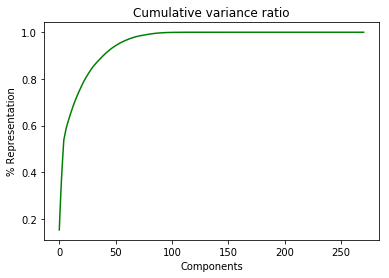

In [38]:
#componantsprinc = pca.explained_variance_ratio_
componantsprinccumsum = pca.explained_variance_ratio_.cumsum()


plt.plot(range(X.shape[1]), componantsprinccumsum, color = 'green')
plt.title('Cumulative variance ratio')
plt.ylabel('% Representation')
plt.xlabel('Components')
plt.show()

# Kmeans analysis

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
pipe = [('scaler', scaler), ('pca', pca), ('kmeans', kmeans)]
kmeanpip = Pipeline(pipe)

In [41]:
kmeanpip.set_params(kmeans__n_clusters = 5) 
#kmeanpip.set_params(kmeans__random_state = None)
#kmeanpip.set_params(kmeans__algorithm = 'full')

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0))])

In [42]:
kmeanpip.fit(X)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0))])

/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1339: UserWarning: findfont: 

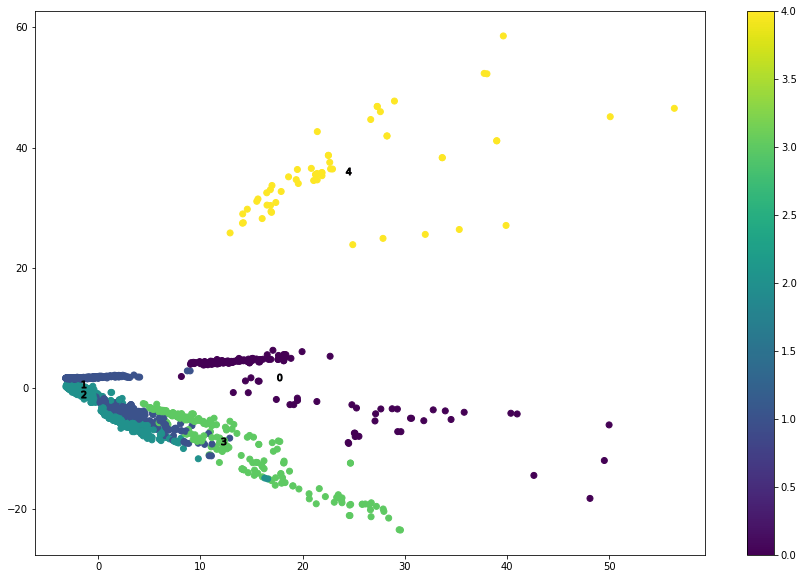

In [43]:
# Graph construction
kmeanpip.fit(X)
Xscaled = kmeanpip.named_steps['scaler'].transform(X)
coords = kmeanpip.named_steps['pca'].transform(Xscaled)[:,:2]
colors = kmeanpip.predict(X)
centers = kmeanpip.named_steps['kmeans'].cluster_centers_

fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(x=coords[:,0], y=coords[:,1], c=colors)
plt.colorbar()
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], marker=f'${i}$', alpha=1, s=50, edgecolor='k')
    


plt.show()



In [186]:
labeltoshow = 4

coltodisplay = ['cut_length', 'num_closed_patterns', 'num_open_patterns', 'total_area', 'minimum_rectangle_area',
                'minimum_rectangle_dim1', 'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area', 'thickness',
                'radius_count', 'direction_count', 'bend_count', 'VAMAT', 'VALAJOUT', 'VALTOT']

labels = kmeanpip.predict(X)
mask = np.where(labels==labeltoshow)
dataset.iloc[mask][coltodisplay].describe()

,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,radius_count,direction_count,bend_count,VAMAT,VALAJOUT,VALTOT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1138.135789,5.722222,5.277778,31062.709405,58170.158408,269.442429,126.311434,41823.888250,33848.662862,6.425926,0.796296,1.055556,1.537037,7.227963,3.681667,10.909630
std,1236.428261,6.988985,3.223830,62666.239817,122068.678385,290.626636,127.953937,80721.957240,64855.139987,2.603349,0.527709,0.762733,1.192950,6.820045,1.828008,8.330277
min,72.522346,1.000000,3.000000,416.012726,524.493958,23.462721,3.228066,416.012726,416.012726,3.000000,0.000000,0.000000,0.000000,0.760000,0.680000,2.010000
25%,325.420547,1.000000,3.000000,1113.710663,3865.980957,73.535583,44.292499,2906.497620,2668.827759,5.000000,0.250000,0.250000,0.250000,2.485000,2.425000,4.487500
50%,788.393066,3.000000,4.000000,8822.076172,14848.098633,147.671600,87.177681,11671.129883,11199.951660,6.000000,1.000000,1.000000,2.000000,4.460000,3.350000,8.430000
75%,1221.302734,7.750000,5.000000,26884.273438,42252.847656,354.166153,139.961124,33506.308594,27456.209473,8.000000,1.000000,2.000000,2.000000,10.010000,4.585000,15.135000
max,5648.251465,44.000000,18.000000,302452.562500,580453.812500,1192.869019,560.742676,377097.500000,313852.125000,15.000000,2.000000,2.000000,4.000000,29.380000,7.650000,37.030000


## Silhouette calculation

In [44]:
range_n_clusters = [2, 3, 5, 8]

For n_clusters = 2 The average silhouette_score is : 0.609642597708712


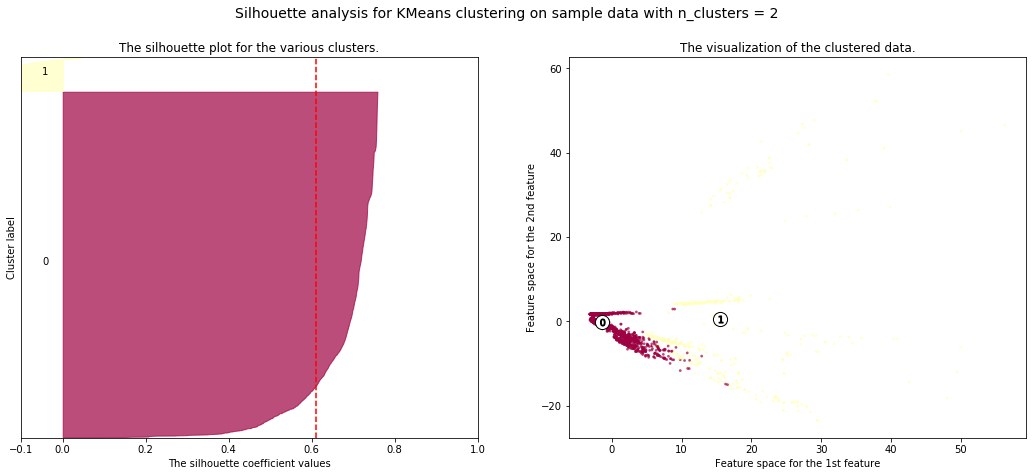

For n_clusters = 3 The average silhouette_score is : 0.6514530367907833


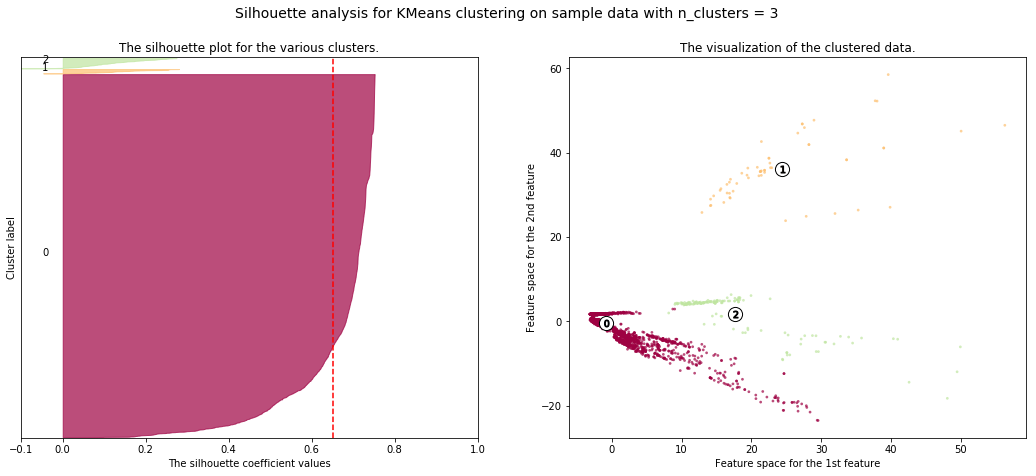

For n_clusters = 5 The average silhouette_score is : 0.25129565890945027


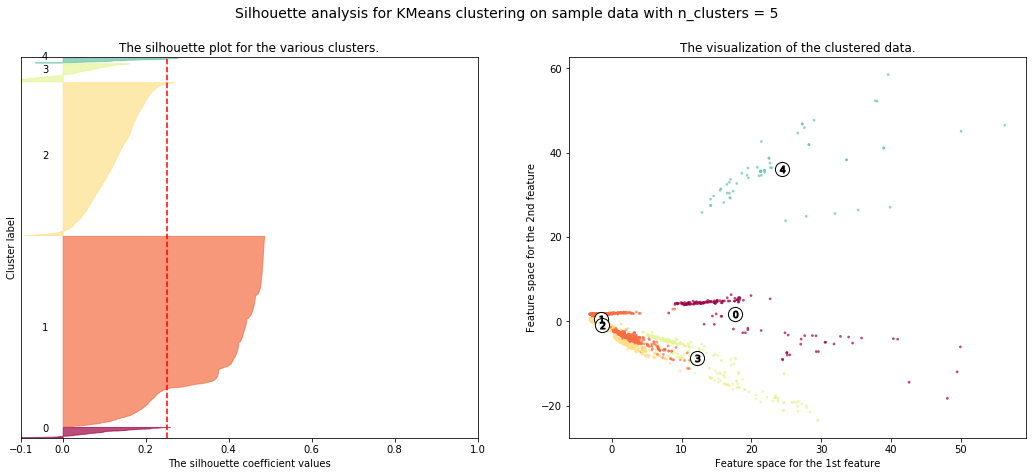

For n_clusters = 8 The average silhouette_score is : 0.2863582414357714


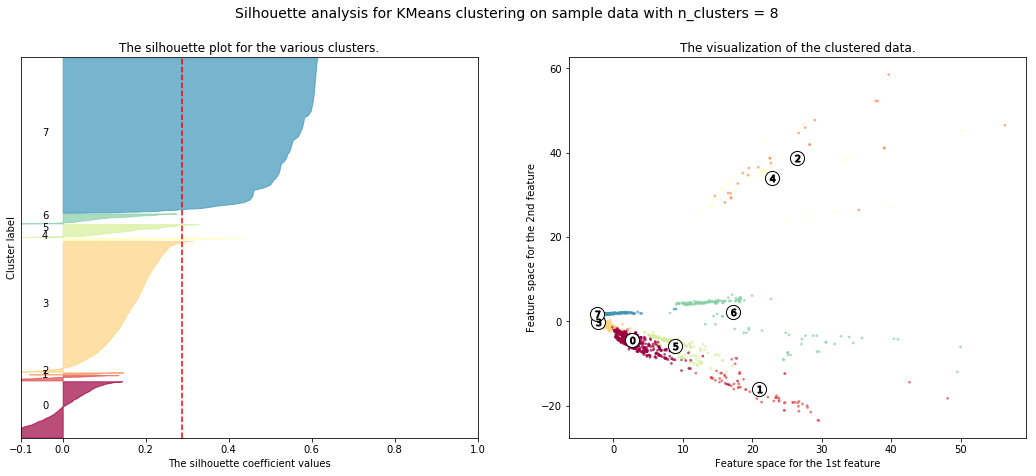

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = kmeanpip
    clusterer.set_params(kmeans__n_clusters = n_clusters)
    cluster_labels = clusterer.fit_predict(X)
    
    Xscaled = clusterer.named_steps['scaler'].transform(X)
    Xpca = clusterer.named_steps['pca'].transform(Xscaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Xpca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Xpca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(Xpca[:, 0], Xpca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.named_steps['kmeans'].cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14)

    plt.show()